In [65]:
# requirements package
# #get latest version of pip
# !pip install --upgrade pip

# #to get continent name from country name
# ! pip install pycountry_convert
# ! pip install --upgrade plotly


# !pip install pmdarima

# Thành viên nhóm

#### Đào Đức Anh - 1712270
#### Phan Hữu Tú - 1712861
#### Bùi Văn Hợp - 1712046

# CORRONA VIRUS 



Corona virus là một đại gia đình Virus gây bệnh cho người cũng như động vật. Ở con người một vài loại virus corona được biết đến là dịch bệnh về hô hấp từ cảm cúm đơn giản cho đến các chiệu trứng nặng như MERS, SARS. Những khám phá mới nhất về loại virus Corona này là COVID-19. (https://www.who.int/)

# COVID 19 


COVID-19 là dịch bệnh có sức lây lan nhanh chóng được khám phá từ Coronavirus. Loại virus mới này và chiệu chứng của nó đã được khám phá từ trước khi bị bùng phát tại Wuhan, China vào tháng 12 năm ngoái. Tới nay, COVID-19 đã trở thành đại dịch trên toàn thế giới






# Content

Mục tiêu của notebook này là tìm hiểu về dữ liệu COVID-19 thông qua việc trực quan hóa dữ liệu đơn giản. Dự đoán một số tầm ảnh hưởng của dịch bệnh và khả năng lây lan của nó trong tương lai.

# Import Some Important Libraries

In [2]:
# math opeations
# import math
# produce random numbers
# import random
# to load json files
import json
# datetime oprations
from datetime import timedelta
# to get web contents
from urllib.request import urlopen

# for numerical analyiss
import numpy as np
# to store and process data in dataframe
import pandas as pd

In [3]:
# basic visualization package
import matplotlib.pyplot as plt
# advanced ploting
import seaborn as sns

# interactive visualization
import plotly



import plotly.express as px
import plotly.graph_objs as go
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots


In [4]:
# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [5]:
# converter
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# to USA states details
# import us

In [6]:
# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

# seaborn plot style
# sns.set_style('darkgrid')

In [7]:
from IPython.core.display import HTML

In [8]:

from pmdarima.arima import auto_arima

# Data Description 

<br>- Dữ liệu được nhóm thu thập dựa trên tập dữ liệu COVID-19 Data Repository bởi trung tâm the Center for Systems Science and Engineering (CSSE) của Đai học Johns Hopkins University.https://github.com/CSSEGISandData/COVID-19
<br>-  Quá trình xử lý dữ liệu nhóm tham khảo từ https://github.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning

- covid_19_clean_complete.csv - dữ liệu ca nhiễm của các quốc gia theo ngày

- usa_county_wise.csv - dữ liệu ca nhiễm của ngày theo ngày

- full_grouped.csv - dữ liệu của tất cả các quốc gia có bao gồm thông tin bang/tỉnh của mỗi quốc gia theo từng ngày

- country_wise_latest.csv - dữ liệu cập nhật mới nhất của mỗi quốc gia

- day_wise.csv - dữ liệu theo ngày không bao gồm thông tin của các quốc gia



# Read Data from CSV file


In [9]:
# Full data
# =========

full_table = pd.read_csv('covid_19_clean_complete.csv')
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [10]:
# Grouped by day, country
# =======================

full_grouped = pd.read_csv('full_grouped.csv')
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])
full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [11]:
# Day wise
# ========

day_wise = pd.read_csv('day_wise.csv')
day_wise['Date'] = pd.to_datetime(day_wise['Date'])
day_wise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [12]:
# Country wise
# ============

country_wise = pd.read_csv('country_wise_latest.csv')
country_wise = country_wise.replace('', np.nan).fillna(0)
country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36782,1288,25669,9825,35,0,0,3.50,69.79,5.02,36368,414,1.14,Eastern Mediterranean
1,Albania,5750,176,3031,2543,130,4,0,3.06,52.71,5.81,4997,753,15.07,Europe
2,Algeria,32504,1248,22375,8881,532,9,474,3.84,68.84,5.58,28615,3889,13.59,Africa
3,Andorra,939,52,825,62,2,0,4,5.54,87.86,6.30,907,32,3.53,Europe
4,Angola,1344,59,503,782,64,1,27,4.39,37.43,11.73,1000,344,34.40,Africa


# Explore Data Analysis

## Day wise Data

In [13]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(full_grouped["Country/Region"].unique()))
print("Total number of Confirmed Cases around the World: ",day_wise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",day_wise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",day_wise["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(day_wise["Confirmed"].iloc[-1]-day_wise["Recovered"].iloc[-1]-day_wise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ",day_wise["Recovered"].iloc[-1]+day_wise["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(day_wise["Confirmed"].iloc[-1]/day_wise.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(day_wise["Recovered"].iloc[-1]/day_wise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(day_wise["Deaths"].iloc[-1]/day_wise.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(day_wise["Confirmed"].iloc[-1]/((day_wise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(day_wise["Recovered"].iloc[-1]/((day_wise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(day_wise["Deaths"].iloc[-1]/((day_wise.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ",day_wise["Confirmed"].iloc[-1]-day_wise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",day_wise["Recovered"].iloc[-1]-day_wise["Recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",day_wise["Deaths"].iloc[-1]-day_wise["Deaths"].iloc[-2])

Basic Information
Totol number of countries with Disease Spread:  187
Total number of Confirmed Cases around the World:  18539372
Total number of Recovered Cases around the World:  11027350
Total number of Deaths Cases around the World:  700631
Total number of Active Cases around the World:  6811391
Total number of Closed Cases around the World:  11727981
Approximate number of Confirmed Cases per Day around the World:  94589.0
Approximate number of Recovered Cases per Day around the World:  56262.0
Approximate number of Death Cases per Day around the World:  3575.0
Approximate number of Confirmed Cases per hour around the World:  3941.0
Approximate number of Recovered Cases per hour around the World:  2344.0
Approximate number of Death Cases per hour around the World:  149.0
Number of Confirmed Cases in last 24 hours:  257911
Number of Recovered Cases in last 24 hours:  220857
Number of Death Cases in last 24 hours:  6953


In [14]:
day_wise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


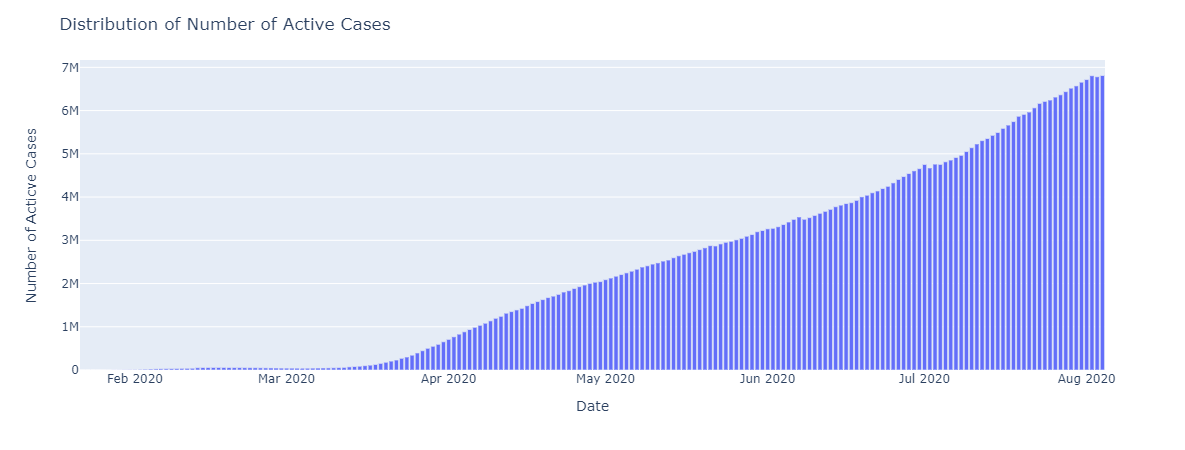

In [15]:
fig=px.bar(x=day_wise.Date,y=day_wise["Active"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Acticve Cases",)
fig.show()

<br>Tại đây ta thấy có mối liên quan của dữ liệu: Số ca thực bị nhiễm (active cases) = số ca dương tính (comfirmed cases) - số ca hồi phục (recovered cases) - số ca chết (death cases)

<br>Số ca thực bị nhiễm mỗi ngày có xu hương tăng cho thấy số người hồi phục và số người chết giảm so với số ca xác nhận dương tính

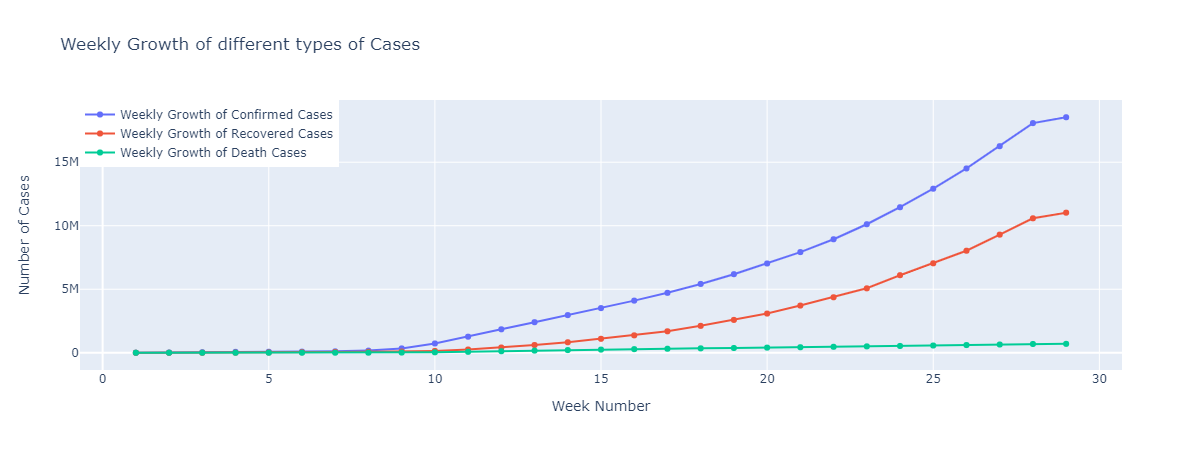

In [16]:
day_wise["WeekOfYear"]=day_wise['Date'].dt.week

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(day_wise["WeekOfYear"].unique()):
    weekwise_confirmed.append(day_wise[day_wise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(day_wise[day_wise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(day_wise[day_wise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num, y=weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Biểu đồ cho ta thấy rõ số lượng các trường hợp tăng qua từng tuần.
Cụ thể là số ca được xác nhận là cao nhất, tiếp đến là số phục hồi và sau cùng là sô người tử vong. Điều này nói lên phần nào căn bệnh chưa hề có vắc-xin nên tỉ lệ lây lan là rất cao nhưng may măn thay tỉ lệ tử vong không quá cao.

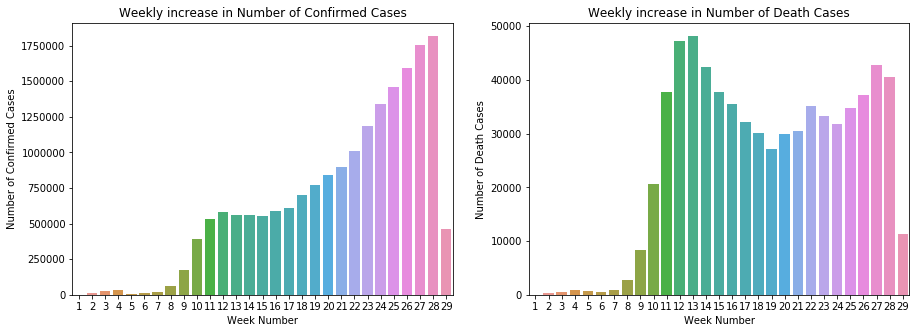

In [17]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in Number of Confirmed Cases")
ax2.set_title("Weekly increase in Number of Death Cases");

<br> Tại vị trí tuần thứ 14 của năm, đây có thể là giai đoạn phát triển của dịch bệnh, hay nói cách khác bệnh có xu hướng bùng phát, làm số người chết tăng mạnh. Tuy nhiên thì từ tuần 14 đến tuần 19, số người chết lại giảm.
<br> Điều trên xảy ra có thể là dịch bệnh đã được kiểm soát khi mọi người đã có ý thức trong việc bảo vệ sức khỏe cho bản thân và cho người khác.
<br> Đặc biệt là số người xác định dương tính và số người chết vẫn tăng sau tuần 19, có thể đây là thời điểm chủng mới của virus covid-19 xuất hiện khiến việc kiếm soát trở nên khó khăn
<br> Tuy nhiên  có 1 tính hiệu tích cực rằng ở tuần thứ 29 (hơn nửa năm cả thế giới chông lại dịch COVID-19) thì kết quả đã khả quan hơn khi số lượng ca nhiễm và số ca tử vong đã giảm đáng kể.

Average Mortality Rate 4.819591836734693
Median Mortality Rate 4.73
Average Recovery Rate 35.327193877551025
Median Recovery Rate 36.775


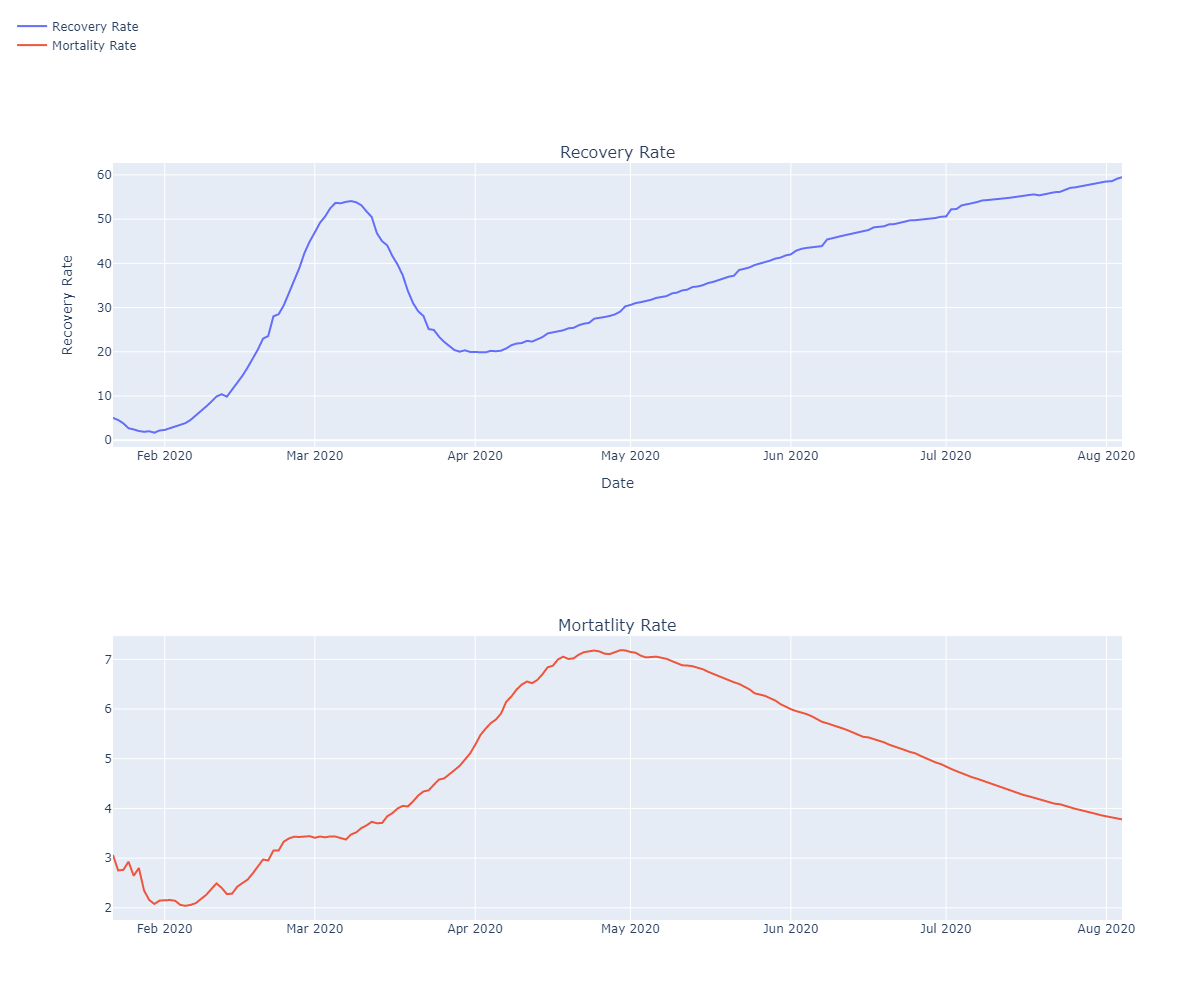

In [18]:

print("Average Mortality Rate",day_wise["Deaths / 100 Cases"].mean())
print("Median Mortality Rate",day_wise["Deaths / 100 Cases"].median())
print("Average Recovery Rate",day_wise["Recovered / 100 Cases"].mean())
print("Median Recovery Rate",day_wise["Recovered / 100 Cases"].median())

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=day_wise.Date, y=(day_wise["Recovered"]/day_wise["Confirmed"])*100,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=day_wise.Date, y=(day_wise["Deaths"]/day_wise["Confirmed"])*100,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

**Nhận xét:**

<br> Con số tử vong (Mortality) được thể hiện trên hình và vẫn là con số dương cho đến hiện nay (tuy đã giảm nhưng vẫn còn nhiều người chết). Và theo thống kê (trên báo) thì người chết chủ yếu tập trung vào tầng lớp tuổi sau trung niên (50 tuổi), họ đã có tuổi và sức khỏe cũng như sức đề kháng yếu.

<br> May mắn là hiện nay số người hồi phục đâu đó có và vẫn sẽ tiếp tục tăng với sự nỗ lực nghiên cứu các loại vắc-xin để đối phó với virus corona này

# Growth Factor

<br>Hệ số tăng trường là con số thể hiện một số liệu tăng qua mỗi ngày.
<br> Cụ thể công thức như sau: **Công thức: Số ca của ngày hôm nay / Số ca của ngày hôm trước** với **số ca  = số ca dương tính + (số ca chết hoặc số ca hồi phục)**
<br>
<br> Tính chất của hệ số tăng trưởng:
<br> 1. Hệ số tăng trưởng lớn hơn 1 tức con số người chết thực tế vẫn đang tăng nhiều hơn so với số người hồi phục
<br> 2. Hệ số tăng trưởng lớn hơn 1 nhưng có xu hướng giảm thì là dấu hiệu tốt cho việc chống lại dịch bệnh (người chết giảm, người hồi phục tăng)
<br> 3. Hệ số tăng trưởng bằng 1 thì tỉ lệ không đổi giữa số người chết và số người hồi phục
<br> 4. Hệ số nhỏ hơn 1 tức là không có thêm ca nhiễm đồng thời số ca hồi phục đang ngày một tăng lên

Average growth factor of number of Confirmed Cases:  1.0586467784354432
Median growth factor of number of Confirmed Cases:  1.0223261683766731
Average growth factor of number of Recovered Cases:  1.0722626315916366
Median growth factor of number of Recovered Cases:  1.034371581553342
Average growth factor of number of Death Cases:  1.0593926567346266
Median growth factor of number of Death Cases:  1.0202846975088968


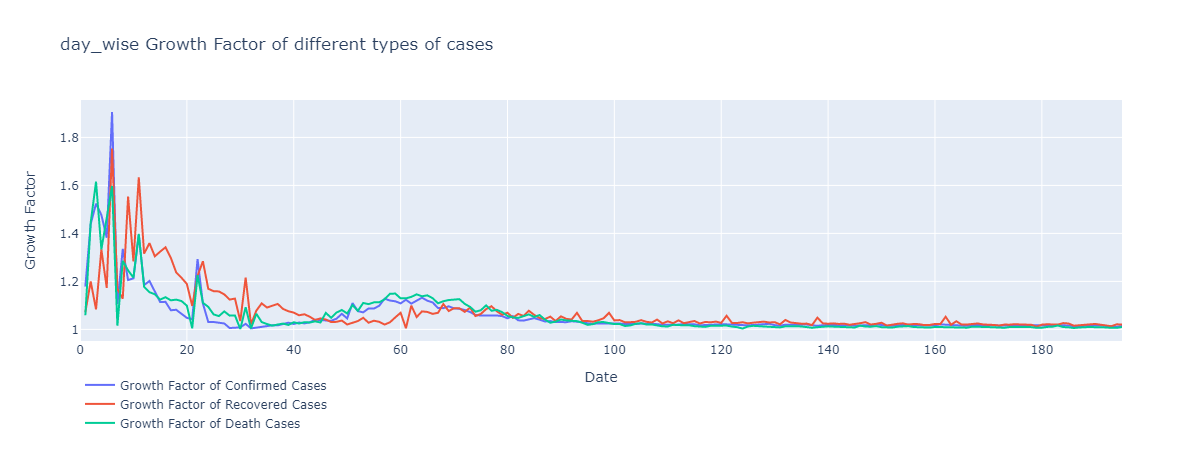

In [19]:
print("Average growth factor of number of Confirmed Cases: ",(day_wise["Confirmed"]/day_wise["Confirmed"].shift()).mean())
print("Median growth factor of number of Confirmed Cases: ",(day_wise["Confirmed"]/day_wise["Confirmed"].shift()).median())
print("Average growth factor of number of Recovered Cases: ",(day_wise["Recovered"]/day_wise["Recovered"].shift()).mean())
print("Median growth factor of number of Recovered Cases: ",(day_wise["Recovered"]/day_wise["Recovered"].shift()).median())
print("Average growth factor of number of Death Cases: ",(day_wise["Deaths"]/day_wise["Deaths"].shift()).mean())
print("Median growth factor of number of Death Cases: ",(day_wise["Deaths"]/day_wise["Deaths"].shift()).median())

fig=go.Figure()
fig.add_trace(go.Scatter(x=day_wise.index, y=day_wise["Confirmed"]/day_wise["Confirmed"].shift(),
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=day_wise.index, y=day_wise["Recovered"]/day_wise["Recovered"].shift(),
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=day_wise.index, y=day_wise["Deaths"]/day_wise["Deaths"].shift(),
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="day_wise Growth Factor of different types of cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

**Nhận xét:**

Qua biểu đồ thấy rõ hệ số tăng trường (growth factor) từ ngày thứ 50 trở đi duy trì ở mức lớn hơn 1 và có xu hướng hội tụ về 1. Điều này nói lên rằng cho tới hiện nay, mỗi ngày đều có thêm người mới dương tính virus Corona và con số này nhiều hơn số người hồi phục.

# CountryWise data Analysis

Ta sẽ phân tích các thông tin về tình hình dịch bệnh theo bộ dữ liệu của các quốc gia được tổng hợp.

In [20]:
country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36782,1288,25669,9825,35,0,0,3.50,69.79,5.02,36368,414,1.14,Eastern Mediterranean
1,Albania,5750,176,3031,2543,130,4,0,3.06,52.71,5.81,4997,753,15.07,Europe
2,Algeria,32504,1248,22375,8881,532,9,474,3.84,68.84,5.58,28615,3889,13.59,Africa
3,Andorra,939,52,825,62,2,0,4,5.54,87.86,6.30,907,32,3.53,Europe
4,Angola,1344,59,503,782,64,1,27,4.39,37.43,11.73,1000,344,34.40,Africa


Text(0.5, 1.0, 'Top 15 Countries with Highest Number of Death Cases in Last 24 Hours')

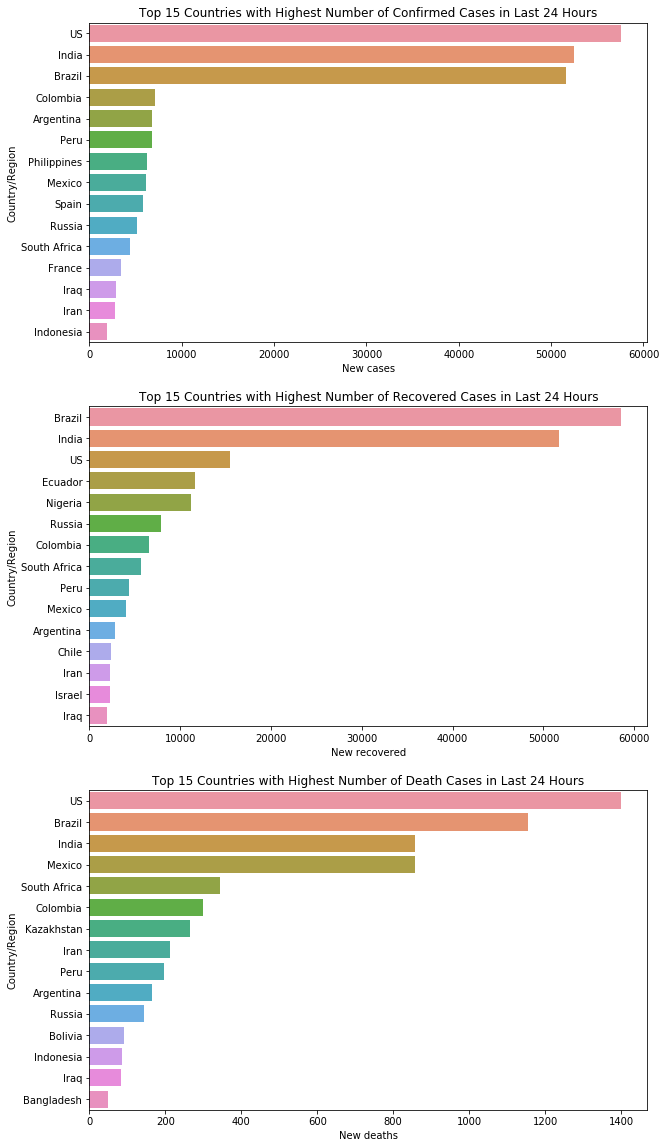

In [21]:
Top_15_Confirmed_24hr=country_wise.sort_values(["New cases"],ascending=False).head(15)
Top_15_Recoverd_24hr=country_wise.sort_values(["New recovered"],ascending=False).head(15)
Top_15_Deaths_24hr=country_wise.sort_values(["New deaths"],ascending=False).head(15)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,20))
sns.barplot(x=Top_15_Confirmed_24hr["New cases"],y=Top_15_Confirmed_24hr["Country/Region"],ax=ax1)
ax1.set_title("Top 15 Countries with Highest Number of Confirmed Cases in Last 24 Hours")
sns.barplot(x=Top_15_Recoverd_24hr["New recovered"],y=Top_15_Recoverd_24hr["Country/Region"],ax=ax2)
ax2.set_title("Top 15 Countries with Highest Number of Recovered Cases in Last 24 Hours")
sns.barplot(x=Top_15_Deaths_24hr["New deaths"],y=Top_15_Deaths_24hr["Country/Region"],ax=ax3)
ax3.set_title("Top 15 Countries with Highest Number of Death Cases in Last 24 Hours")

**Nhận xét:**
<br> Theo như quan sát thì 3 nước Mỹ, Ấn độ, Brazil là 3 quốc có số ca nhiễm, hồi phục và tử vong là cao nhất.
<br> Trong khi Mỹ là nước có số ca nhiễm mới lớn nhất tuy nhiên số ca phục hồi lại thấp nhất mà số ca tử vong cũng cao nhất.Brazil và Ấn Độ thì có số ca phục hồi cao hơn và số ca tử vong mới cũng là thấp hơn so với Mĩ trong 24h vừa qua

# Clustering of Countries

Tình hình dịch bệnh ở mỗi nước là khác nhau bởi nhiều yếu tố tác động và còn ảnh hưởng với sự tác động của chính phủ mỗi nước trong công cuộc phòng chống và đẩy lui COVID 19. Ta sẽ thử phân cụm các quốc gia dựa trên tỉ lệ tử vong và tỉ lệ phục hồi của từng nước vơi hi vọng có thể rút ra được insight hữu ích. Tỉ lệ tử vong và tỉ lệ phục hồi cũng sẽ thể hiện được các chỉ số về số ca bệnh được xác nhận, số ca hồi phục, số ca tử vong,


In [22]:
country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36782,1288,25669,9825,35,0,0,3.50,69.79,5.02,36368,414,1.14,Eastern Mediterranean
1,Albania,5750,176,3031,2543,130,4,0,3.06,52.71,5.81,4997,753,15.07,Europe
2,Algeria,32504,1248,22375,8881,532,9,474,3.84,68.84,5.58,28615,3889,13.59,Africa
3,Andorra,939,52,825,62,2,0,4,5.54,87.86,6.30,907,32,3.53,Europe
4,Angola,1344,59,503,782,64,1,27,4.39,37.43,11.73,1000,344,34.40,Africa


In [23]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = country_wise[["Deaths","Recovered"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X = std.fit_transform(X) 

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Elbow Method')

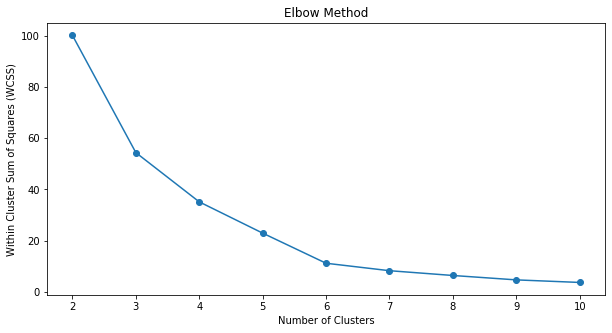

In [25]:
x=np.arange(2,11)
plt.figure(figsize=(10,5))
plt.plot(x,wcss,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method")

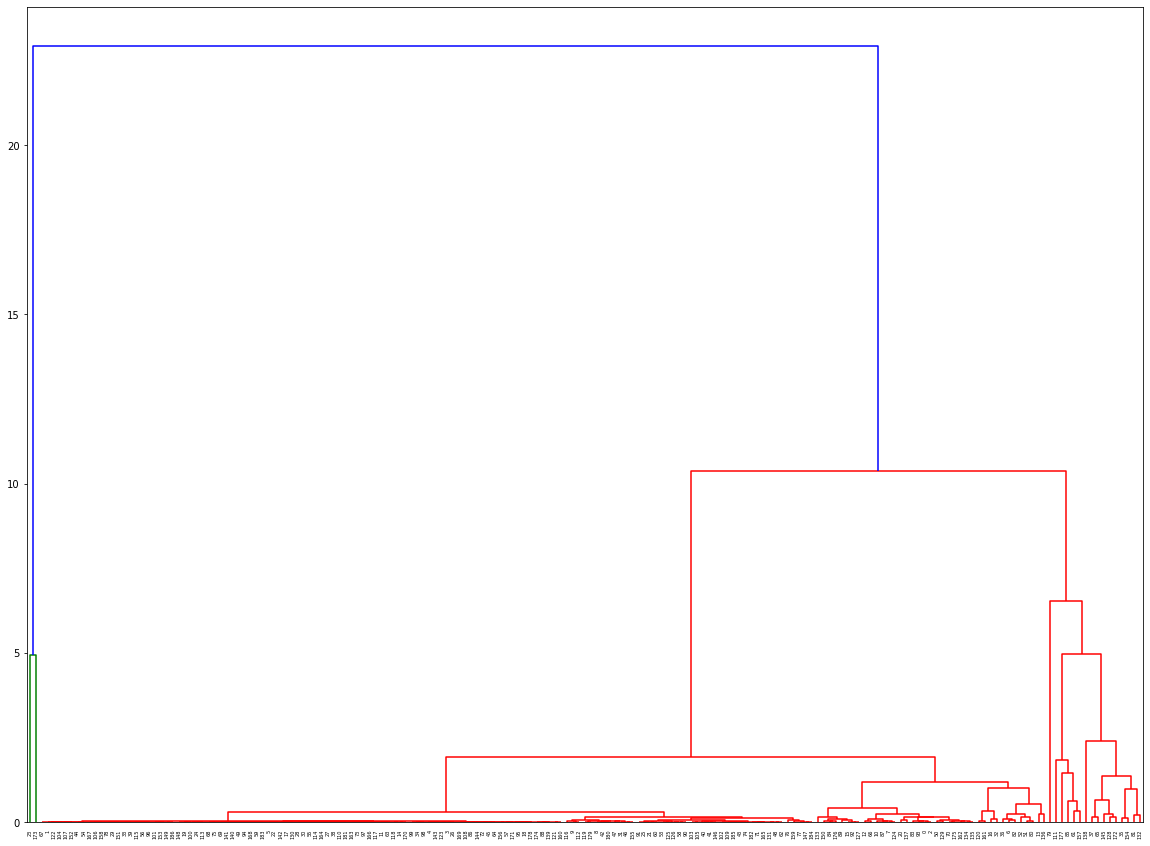

In [26]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))

$\implies$Theo phương pháp Elbow và Hierahical clustering ta có thể xét K=3 là số lượng cụm để xây dụng bộ phân cụm Kmean giữa các quốc gia.



In [27]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(n_clusters=3, random_state=6)

In [28]:
country_wise["Clusters"]=clf_final.predict(X)

In [29]:
cluster_summary=pd.concat([country_wise[country_wise["Clusters"]==1].head(15),country_wise[country_wise["Clusters"]==2].head(15),country_wise[country_wise["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Clusters
23,Brazil,2801921,95819,2157484,548618,51603,1154,58508,3.420000,77.000000,4.440000,2483191,318730,12.840000,Americas,1
173,US,4771080,156801,1528979,3085300,57540,1399,15533,3.290000,32.050000,10.260000,4356206,414874,9.520000,Americas,1
35,Chile,362962,9745,336330,16887,1469,38,2354,2.680000,92.660000,2.900000,349800,13162,3.760000,Americas,2
61,France,228576,30297,81764,116515,3378,29,0,13.250000,35.770000,37.050000,221077,7499,3.390000,Europe,2
79,India,1908254,39795,1282215,586244,52509,857,51706,2.090000,67.190000,3.100000,1531669,376585,24.590000,South-East Asia,2
81,Iran,314786,17617,272535,24634,2751,212,2307,5.600000,86.580000,6.460000,296273,18513,6.250000,Eastern Mediterranean,2
85,Italy,248419,35171,200766,12482,190,5,177,14.160000,80.820000,17.520000,246488,1931,0.780000,Europe,2
111,Mexico,449961,48869,357444,43648,6148,857,4002,10.860000,79.440000,13.670000,402697,47264,11.740000,Americas,2
132,Peru,439890,20007,302457,117426,6790,196,4366,4.550000,68.760000,6.610000,395005,44885,11.360000,Americas,2
138,Russia,859762,14327,660235,185200,5121,144,7863,1.670000,76.790000,2.170000,822060,37702,4.590000,Europe,2


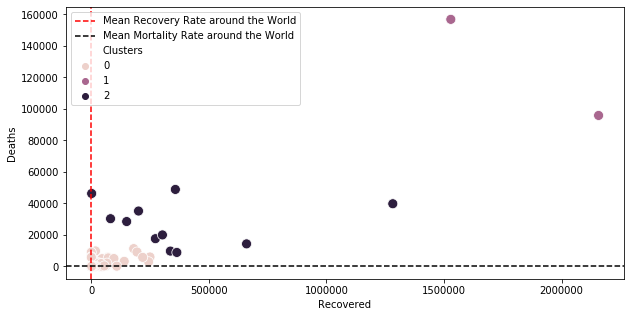

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=country_wise["Recovered"],y=country_wise["Deaths"],hue=country_wise["Clusters"],s=100)
plt.axvline(((day_wise["Recovered"]/day_wise["Confirmed"])*100).mean(),
            color='red',linestyle="--",label="Mean Recovery Rate around the World")
plt.axhline(((day_wise["Deaths"]/day_wise["Confirmed"])*100).mean(),
            color='black',linestyle="--",label="Mean Mortality Rate around the World")
plt.legend(loc=2)

In [31]:
print("Avergae Mortality Rate of Cluster 0: ",country_wise[country_wise["Clusters"]==0]["Deaths / 100 Cases"].mean())
print("Avergae Recovery Rate of Cluster 0: ",country_wise[country_wise["Clusters"]==0]["Recovered / 100 Cases"].mean())
print("Avergae Mortality Rate of Cluster 1: ",country_wise[country_wise["Clusters"]==1]["Deaths / 100 Cases"].mean())
print("Avergae Recovery Rate of Cluster 1: ",country_wise[country_wise["Clusters"]==1]["Recovered / 100 Cases"].mean())
print("Avergae Mortality Rate of Cluster 2: ",country_wise[country_wise["Clusters"]==2]["Deaths / 100 Cases"].mean())
print("Avergae Recovery Rate of Cluster 2: ",country_wise[country_wise["Clusters"]==2]["Recovered / 100 Cases"].mean())

Avergae Mortality Rate of Cluster 0:  2.7051149425287364
Avergae Recovery Rate of Cluster 0:  67.20534482758619
Avergae Mortality Rate of Cluster 1:  3.355
Avergae Recovery Rate of Cluster 1:  54.525
Avergae Mortality Rate of Cluster 2:  7.367272727272726
Avergae Recovery Rate of Cluster 2:  64.35636363636364


**Nhận xét:**

Nhóm 2 là một cụm các nước có tỉ lệ người chết cao và có tỉ lệ hồi phục tương đối ổn. Về cơ bản thì một vài nước trong nhưng nhóm này từng trở thành một trong các ổ đại dịch nhưng lại chống chọi tốt với chúng.

Nhóm 0 là nhóm các nước có tỉ lệ người tỉ vong thấp mà tỉ lệ hồi phục lại cao. Nhưng nước này có khả năng kiểm soát rất tốt dịch bệnh dựa trên kinh nghiệm của các nước thuộc nhóm 2.

Nhóm 1 là tập hợp các nước có tỉ lệ người chết thấp và tỉ lệ hồi phục ở mức trung bình. Các nước này cần tập trung phát triển về y tế đề kiểm soát tốt dịch bệnh cũng như chăm sóc tốt cho số lượng người đã và đang dương tính.

In [32]:
print("Few Countries belonging to Cluster 0: ",list(country_wise[country_wise["Clusters"]==0].head(15)['Country/Region']))
print("Few Countries belonging to Cluster 1: ",list(country_wise[country_wise["Clusters"]==1].head(15)['Country/Region']))
print("Few Countries belonging to Cluster 2: ",list(country_wise[country_wise["Clusters"]==2].head(15)['Country/Region']))

Few Countries belonging to Cluster 0:  ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados']
Few Countries belonging to Cluster 1:  ['Brazil', 'US']
Few Countries belonging to Cluster 2:  ['Chile', 'France', 'India', 'Iran', 'Italy', 'Mexico', 'Peru', 'Russia', 'South Africa', 'Spain', 'United Kingdom']


Rõ ràng:
<br> Nhóm 0 là nhóm các quốc gia ít dân, thu nhập cao, hệ thống y tế phát triển tốt.
<br> Nhóm 1 phần lớn là các quốc gia đông dân, hệ thống y tế phát triển nhưng lại rất tốn kém, dẫn đến ít người điều trị
<br> Nhóm 2 ta có thể thấy rõ các nước luôn có trên bản tin thời sự cập nhật tình hình Corona toàn thế giới như: United Kingdom, South Africa, Italy, Chile, ...

### Data Analysis cho dữ liệu về Việt Nam

In [33]:
vn_data = full_grouped[full_grouped["Country/Region"] == 'Vietnam']
vn_data.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
35898,2020-07-31,Vietnam,558,3,373,182,49,3,0,Western Pacific
36085,2020-08-01,Vietnam,590,3,373,214,32,0,0,Western Pacific
36272,2020-08-02,Vietnam,621,6,373,242,31,3,0,Western Pacific
36459,2020-08-03,Vietnam,652,7,374,271,31,1,1,Western Pacific
36646,2020-08-04,Vietnam,672,8,378,286,20,1,4,Western Pacific


In [34]:
print(vn_data.iloc[-1])
print("Total Active Cases: ",vn_data["Active"].iloc[-1])
print("Total Closed Cases: ",vn_data["Recovered"].iloc[-1]+vn_data["Deaths"].iloc[-1])

Date              2020-08-04 00:00:00
Country/Region                Vietnam
Confirmed                         672
Deaths                              8
Recovered                         378
Active                            286
New cases                          20
New deaths                          1
New recovered                       4
WHO Region            Western Pacific
Name: 36646, dtype: object
Total Active Cases:  286
Total Closed Cases:  386


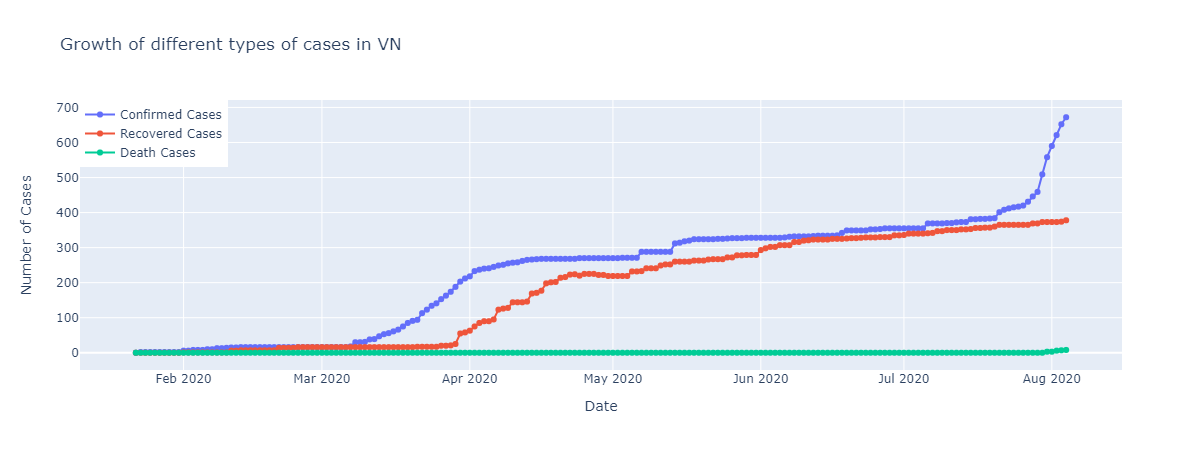

In [35]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=vn_data.Date, y=vn_data["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=vn_data.Date, y=vn_data["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=vn_data.Date, y=vn_data["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases in VN",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

**Nhận xét:**
<br> Dễ thấy nước ta bắt đầu dùng phát dịch từ đầu tháng 3 và tình hình dịch bệnh nước ta kiếm soát cực kì tốt khi số ca nhiễm tăng thì số ca hồi phục tăng và số người tử vong là bằng 0 trong suốt thời gian đầu cho tới cuối tháng 7, đầu tháng 8 thì mới có các ca tử vong đầu tiên
<br> Đợt tái nhiễm trong cộng đồng lần này từ giữa tháng 7 số ca nhiễm đã tăng mạnh trở lại và đã bắt đầu có các ca tử vong trên nước ta

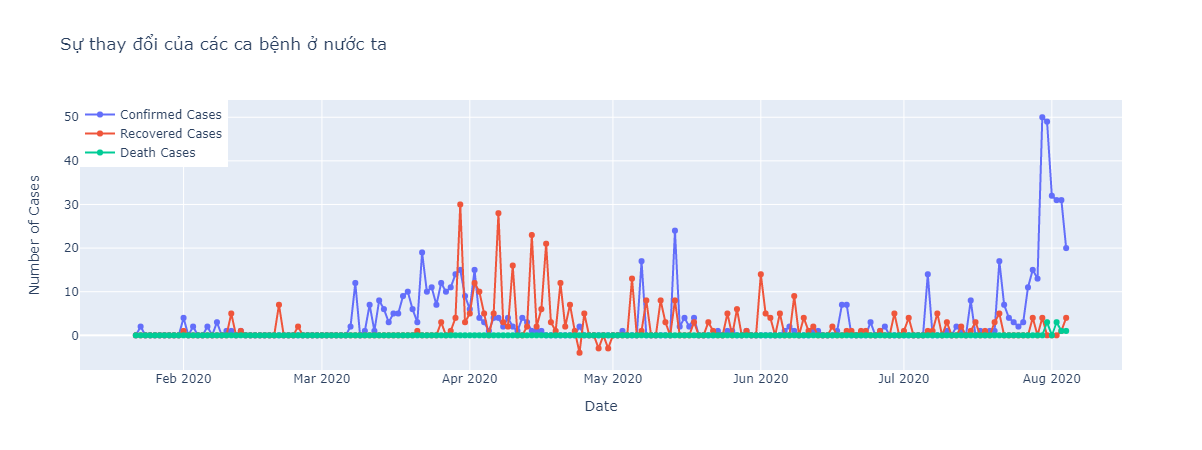

In [36]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=vn_data.Date, y=vn_data["Confirmed"].diff().fillna(0),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=vn_data.Date, y=vn_data["Recovered"].diff().fillna(0),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=vn_data.Date, y=vn_data["Deaths"].diff().fillna(0),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Sự thay đổi của các ca bệnh ở nước ta",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

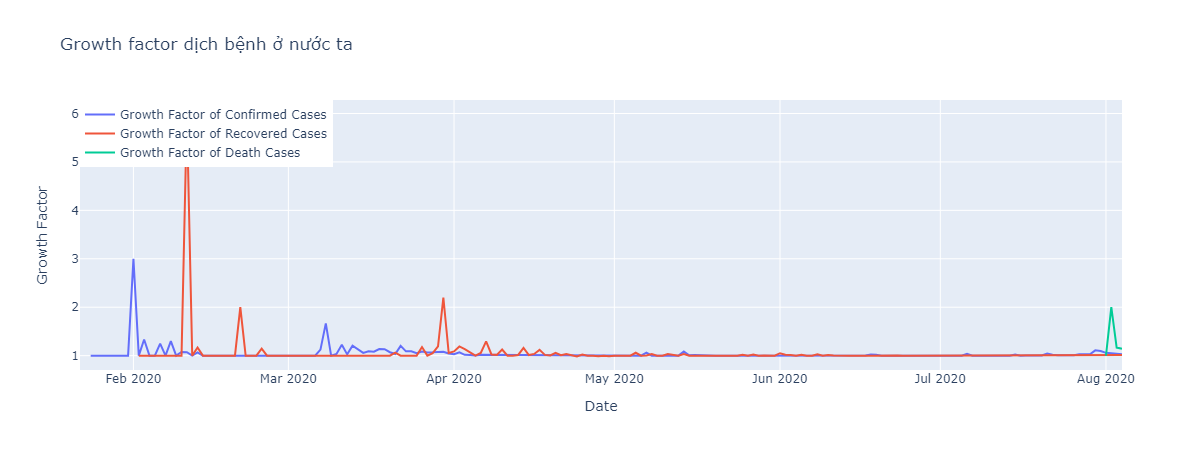

In [37]:
VN_increase_confirm=[]
VN_increase_recover=[]
VN_increase_deaths=[]
for i in range(vn_data.shape[0]-1):
    VN_increase_confirm.append(((vn_data["Confirmed"].iloc[i+1])/vn_data["Confirmed"].iloc[i]))
    VN_increase_recover.append(((vn_data["Recovered"].iloc[i+1])/vn_data["Recovered"].iloc[i]))
    VN_increase_deaths.append(((vn_data["Deaths"].iloc[i+1])/vn_data["Deaths"].iloc[i]))
VN_increase_confirm.insert(0,1)
VN_increase_recover.insert(0,1)
VN_increase_deaths.insert(0,1)

fig=go.Figure()
fig.add_trace(go.Scatter(x=vn_data.Date, y=VN_increase_confirm,
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=vn_data.Date, y=VN_increase_recover,
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=vn_data.Date, y=VN_increase_deaths,
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Growth factor dịch bệnh ở nước ta",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

**Nhận xét:**
<br> theo biểu đồ sự thay đổi của dịch và growth factor ở nước ta dễ thấy xu hướng ở nước ta rằng khi số ca nhiễm tăng thì số ca hồi phục sẽ tăng mạnh theo sau một khoảng thời gian là 2 tuần. Điều này mang lại dấu hiệu đáng mừng rằng nước ta đang kiểm soát dịch rất chặt chẽ, bộ y tế và các cơ quan ban ngành đang cố gắng tích cực đảm bảo sức khỏe cho mọi người.

# Prediction using Machine Learning Models

Ở phần này nhóm sẽ thử áp dụng một vài mô hình học máy vào việc dự đoán số ca nhiễm trong thười gian tiếp theo

### Linear Regression Model for Confirm Cases Prediction

In [38]:
day_wise["Days Since"]=day_wise.Date-day_wise.Date[0]
day_wise["Days Since"]=day_wise["Days Since"].dt.days

In [39]:
train_ml=day_wise.iloc[:int(day_wise.shape[0]*0.95)]
valid_ml=day_wise.iloc[int(day_wise.shape[0]*0.95):]
model_scores=[]

In [40]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lin_reg=LinearRegression(normalize=True)

In [41]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(normalize=True)

In [42]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [43]:
from sklearn.metrics import mean_squared_error,r2_score
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  5301307.902773933


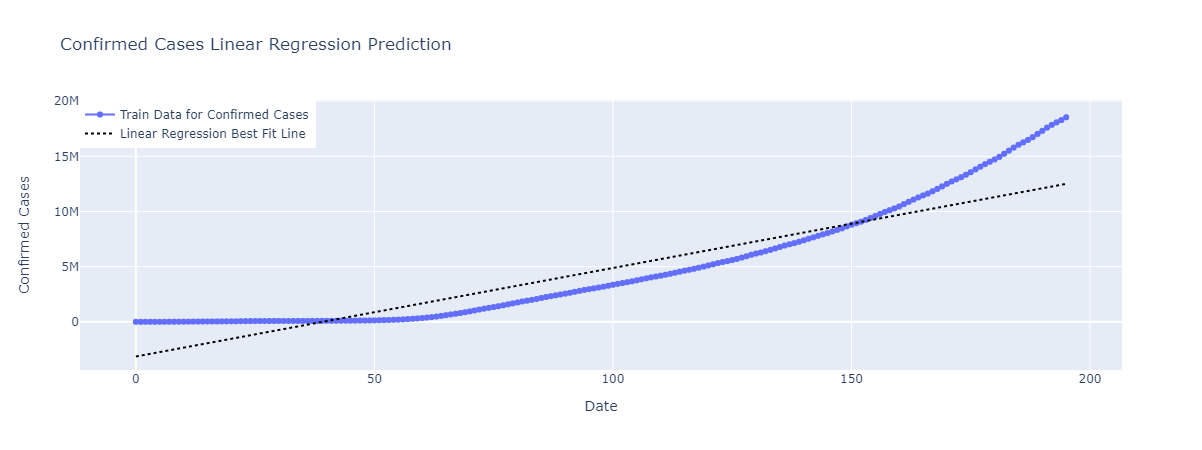

<Figure size 792x432 with 0 Axes>

In [44]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(day_wise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=day_wise.index, y=day_wise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=day_wise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Mục đích của phần này là xem coi số tỉ lệ ca dương tính có đang phát triển một cách tuyến tính hay không. Và thực tế là không hề tuyến tính. Mặc dù kết quả dự đoán được có độ chính xác không cao nhưng ta có thể thây được mô hình linear chỉ ra được xu hướng của số ca nhiễm.

### Polynomial Regression for Prediction of Confirmed Cases

In [45]:
train_ml=day_wise.iloc[:int(day_wise.shape[0]*0.95)]
valid_ml=day_wise.iloc[int(day_wise.shape[0]*0.95):]

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 8) 

In [47]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [48]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(normalize=True)

In [49]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  611243.2094051942


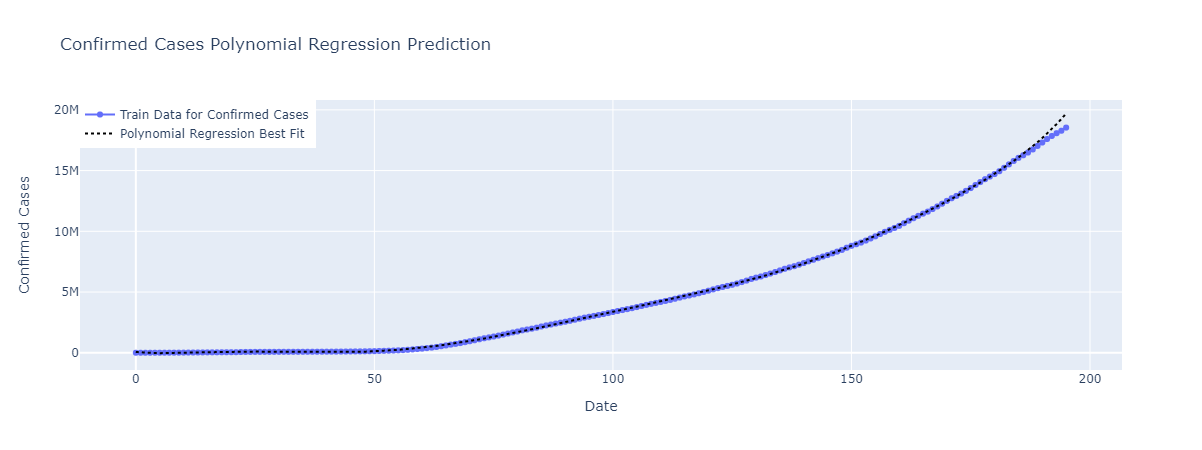

<Figure size 792x432 with 0 Axes>

In [50]:
comp_data=poly.fit_transform(np.array(day_wise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=day_wise.index, y=day_wise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=day_wise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Với mô hình linear nhưng qua biến đổi polynomial với bậc 8 kết quả dự đoán đã tốt hơn

### Support Vector Machine ModelRegressor for Prediction of Confirmed Cases

In [51]:
train_ml=day_wise.iloc[:int(day_wise.shape[0]*0.95)]
valid_ml=day_wise.iloc[int(day_wise.shape[0]*0.95):]

In [52]:
from sklearn.svm import SVR
#Intializing SVR Model
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.01)

In [53]:
#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

SVR(C=1, degree=5, epsilon=0.01, kernel='poly')

In [54]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [55]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

Root Mean Square Error for Support Vectore Machine:  6568907.554931888


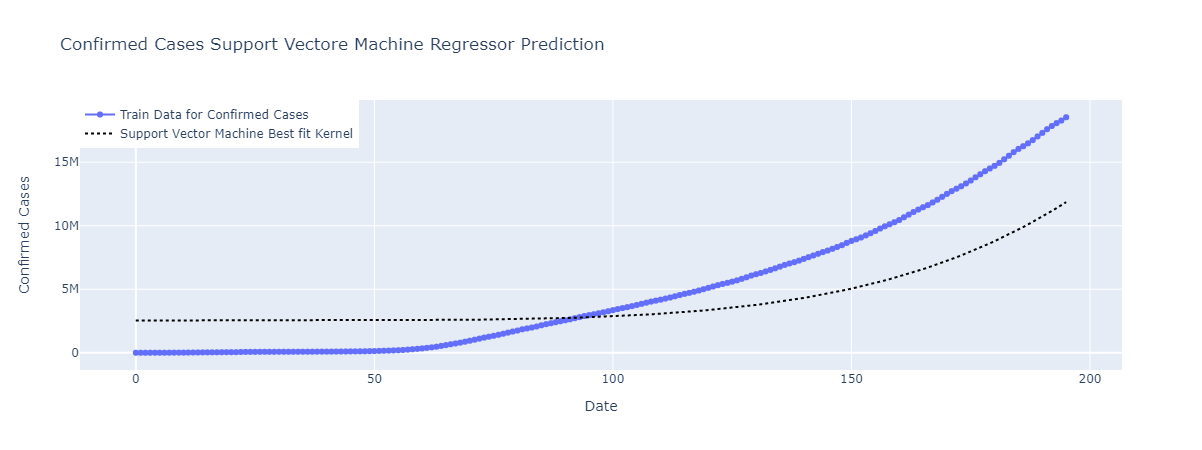

<Figure size 792x432 with 0 Axes>

In [56]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(day_wise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=day_wise.index, y=day_wise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=day_wise.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Có lẽ việc dụng SVM để dự đoán số ca nhiễm trong trường hợp này mang lại kết quả khá tệ


# Time Series Forecasting

Vì dữ liệu quan sát được ở đây chính là times serries, ta sẽ thử sử dụng mô hình ARIMA ( chọn tham số tự động bởi package pmarima)

### ARIMA Model (using AUTO ARIMA)

In [57]:
model_train=day_wise.iloc[:int(day_wise.shape[0]*0.95)]
valid=day_wise.iloc[int(day_wise.shape[0]*0.95):]
y_pred=valid.copy()

In [58]:
model_arima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3972.616, Time=1.44 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3974.159, Time=0.13 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=3969.567, Time=0.13 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=3976.947, Time=0.22 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3974.334, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3971.655, Time=0.21 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3979.030, Time=0.66 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=3964.598, Time=0.35 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3965.511, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3948.905, Time=0.28 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=3978.121, Time=0.66 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=3913.641, Time=0.66 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=3952.442, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=3933.190, Time=0.17 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=4188.781, Time=0.83 sec
Total fit 

ARIMA(order=(2, 2, 3), scoring_args={}, suppress_warnings=True)

In [59]:
prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima

In [60]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))

Root Mean Square Error for ARIMA Model:  214104.05026045447


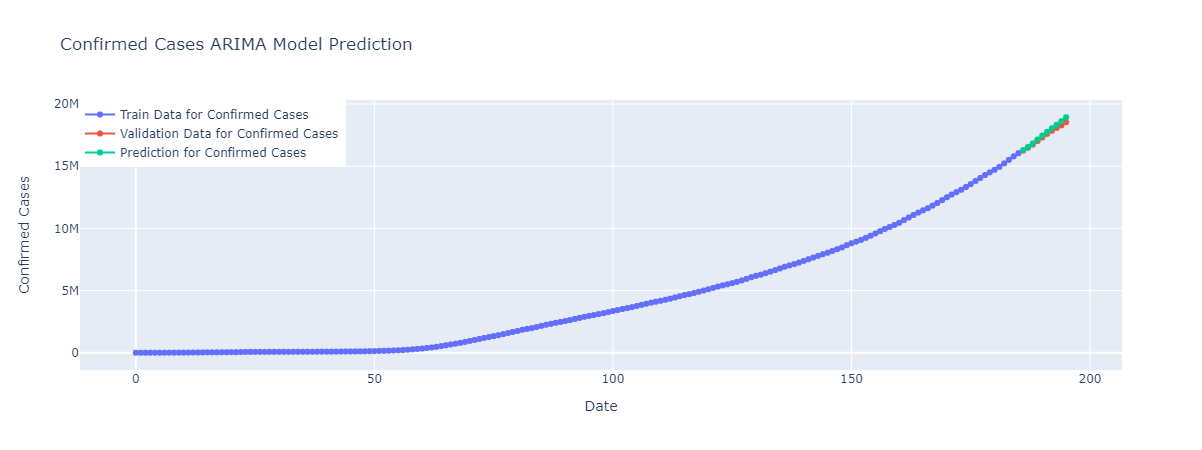

In [61]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

**Nhận xét:**
<br> Kết quả cho thấy mô hình Arima(2,2,3) có kết quả khá là tốt với độ lỗi Root Mean Square Error (RMSE):  214104.05 


#### So sánh kết quả giữa các mô hình

In [62]:
model_names=["Linear Regression","Polynomial Regression","Support Vector Machine Regressor","ARIMA Model"]
model_summary=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error
3,ARIMA Model,2.141041e+05
1,Polynomial Regression,6.112432e+05
0,Linear Regression,5.301308e+06
2,Support Vector Machine Regressor,6.568908e+06


Kết quả của Arima cho kết quả tốt hơn so với các model còn lại

In [63]:
new_date=[]

for i in range(1,18):
    new_date.append(day_wise.Date.iloc[-1]+timedelta(days=i))
ARIMA_model_new_prediction=model_arima.predict(len(new_date))

In [64]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,ARIMA_model_new_prediction),
                               columns=["Dates","ARIMA model prediction"])
model_predictions

,Dates,ARIMA model prediction
0,2020-08-05,16293585.682604
1,2020-08-06,16551354.498589
2,2020-08-07,16836172.920610
3,2020-08-08,17146243.326242
4,2020-08-09,17463701.807365
5,2020-08-10,17768380.037036
6,2020-08-11,18053319.460792
7,2020-08-12,18330103.776449
8,2020-08-13,18619923.401393
9,2020-08-14,18937264.644546


# Conclusion 


<br> - COVID-19 là một đại dịch đang lây lan mạnh mẽ và ảnh hưởng đến toàn thể nhân loại, dịch bệnh này có tỉ lệ lây lan giữa người với người là cực kì cao với cấp số nhân cùng các triệu chứng nghiêm trọng mà dịch bệnh mang lại sẽ ảnh hưởng rất nhiều đến tất cả mọi người, nhưng may mắn thay tỉ lệ tử vong của COVID-19 không quá cao và tỉ lệ hồi phục của dịch mang lại các dấu hiệu tích cực cho thấy rằng chúng ta sẽ vượt qua được COVID-19. 
<br> - Growth Factor hội tụ về 1 cho thấy các ca nhiễm đang được kiểm soát tốt, tỉ lệ tăng các ca nhiễm sau một thời gian tăng một cách đột biến đã có xu hướng giảm tuy nhiên chúng ta cần đẩy mạnh các công tác phòng chống dịch, nâng cao cảnh giác để có thể nhanh chóng thoát khỏi đại dịch này.
<br> Mĩ và Brazil là 2 cường quốc mạnh khi tỉ lệ phục phồi của các ca bệnh là khá cao tuy nhiên tỉ lệ tử vong cũng khá là cao.
<br> Việt Nam ta với tinh thần cảnh giác cao ngăn chặn dịch từ sớm do đó tình hình dịch bệnh ở nước ta được kiểm soát khá là tốt. Mặc dù đợt bùng phát lại trong cộng đồng lần này đã có những ca tử vong đầu tiên tại nước ta nhưng tỉ lệ phục hồi của nước ta là khá cao và tỉ lệ tăng các ca nhiễm mới đang giảm dần.

 